**Ejercicio N° 3**

El archivo `202207_PAX15min-ABC.csv` contiene información sobre la cantidad de pasajeros por molinete y por estación en rangos de a 15 minutos de las líneas A, B y C de la red de Subtes de la Ciudad Autónoma de Buenos Aires (CABA). 


    


In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('datasets\\202207_PAX15min-ABC.csv', encoding='latin-1')
df.sample(5)

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
132041,07-07-22,20:15:00,20:30:00,LineaB,LineaB_Lacroze_S_Turn02,Federico Lacroze,3,0,1,4
569536,30-07-22,18:15:00,18:30:00,LineaB,LineaB_Pueyr_S_Turn02,Pueyrredon,23,0,0,23
536705,29-07-22,6:00:00,6:15:00,LineaB,LineaB_Florida_E_Turn02,Florida,1,0,1,2
252025,14-07-22,9:45:00,10:00:00,LineaA,LineaA_Lima_N_Turn02,Lima,8,0,0,8
331138,18-07-22,14:00:00,14:15:00,LineaA,LineaA_Carabobo_O_Turn02,Carabobo,6,0,0,6


1. Realice el *binning* de la variable que corresponde a la hora inicial del intervalo de 15 minutos (columna `DESDE`) en los siguientes periodos a lo largo del día: de 
5-9 hs., 
9.15-12 hs., 
12.15-15 hs., 
15.15 - 18 hs., 
18.15-21 hs., 
21.15 -24 hs.

labels = ('5 - 9', 'Otros', '9:15 - 12', 'Otros', '12:15 - 15', 'Otros', '15:15 - 18', 'Otros', '18:15 - 21', 'Otros', '21:15 - 24')

In [22]:
df['DESDE'] = pd.to_datetime(df['DESDE'])


bins = (5, 9, 9.25, 12, 12.15, 15, 15.15, 18, 18.15, 21, 21.15, 24)
labels = ('5 - 9', 'Otros', '9:15 - 12', 'Otros', '12:15 - 15', 'Otros', '15:15 - 18', 'Otros', '18:15 - 21', 'Otros', '21:15 - 24')
df['hora_decimal'] = df['DESDE'].dt.hour + df['DESDE'].dt.minute/60
df['DESDE_CAT'] = pd.cut(df['hora_decimal'], bins=bins, labels=labels, ordered=False)
df = df.drop(columns = 'hora_decimal')
# Ahora los ordenamos:
orden_horarios = [
    '5 - 9',
    '9:15 - 12',
    '12:15 - 15',
    '15:15 - 18',
    '18:15 - 21',
    '21:15 - 24',
    'Otros'
]
df['DESDE_CAT'] = pd.Categorical(df['DESDE_CAT'], categories=orden_horarios, ordered=True)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_43332\590298265.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DESDE'] = pd.to_datetime(df['DESDE'])


Represente gráficamente el total de pasajeros para **cada día** en cada rango horario y para cada una de las líneas de subte (un gráfico para cada línea de subte por separado). 
¿Hay algún rango horario en el que, en general, se observen más pasajeros respecto de otros rangos? ¿Presentan un comportamiento similar las 3 líneas de subte respecto a la cantidad total de pasajeros en cada rango horario?

Análisis:
nos pide visualizar por las dimensiones:
- Día
- Rango horario (la categorización recientemente creada)
- para cada una de las líneas.

La solución será hacer un gráfico de barras agrupando por día y luego colorear con hue las categorías.

Antes que nada tenemos que transformar el tipo de variable fecha a datetime
Luego sería una posibilidad generar una tabla que contenga estos valores, con esta tabla luego generaremos el gráfico.


In [23]:
# Primero convertimos la columna fecha en tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_43332\257121052.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA'] = pd.to_datetime(df['FECHA'])


In [24]:
tabla_ej1 = df.groupby(['FECHA','DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'count'})
tabla_ej1


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_43332\3396915190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_ej1 = df.groupby(['FECHA','DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'count'})


,FECHA,DESDE_CAT,LINEA,count
0,2022-01-07,5 - 9,LineaA,1578
1,2022-01-07,5 - 9,LineaB,1726
2,2022-01-07,5 - 9,LineaC,900
3,2022-01-07,9:15 - 12,LineaA,1226
4,2022-01-07,9:15 - 12,LineaB,1349
...,...,...,...,...
646,2022-12-07,21:15 - 24,LineaB,850
647,2022-12-07,21:15 - 24,LineaC,386
648,2022-12-07,Otros,LineaA,107
649,2022-12-07,Otros,LineaB,121


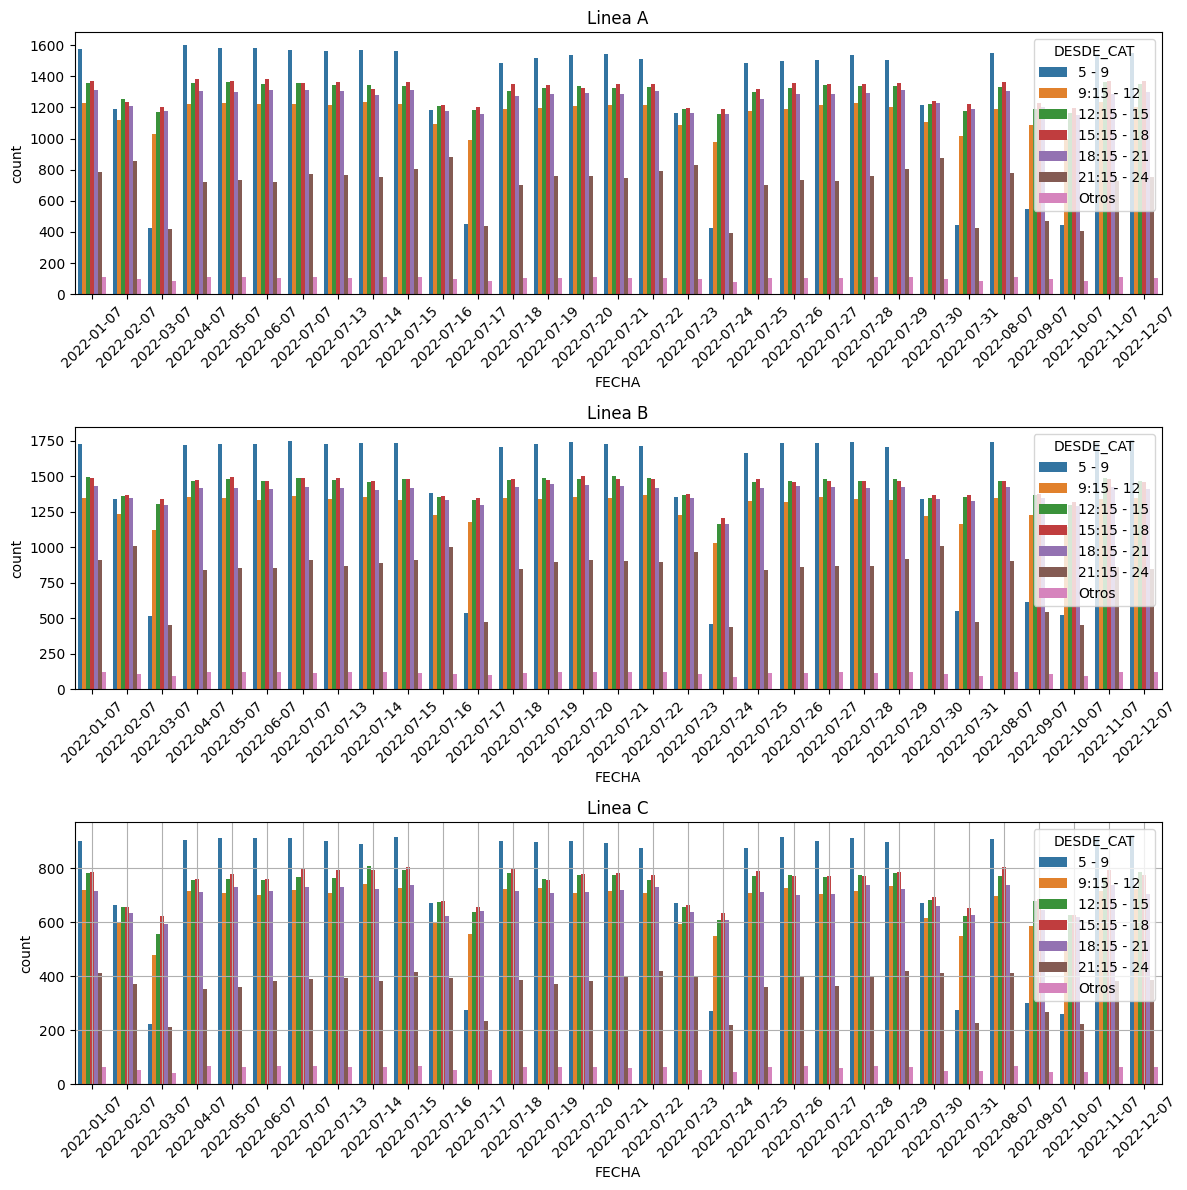

In [25]:
fig, axes = plt.subplots(3,1,figsize=(12,12))

sns.barplot(data=tabla_ej1[tabla_ej1['LINEA'] == 'LineaA'], x='FECHA', y='count', hue='DESDE_CAT',ax=axes[0])
sns.barplot(data=tabla_ej1[tabla_ej1['LINEA'] == 'LineaB'], x='FECHA', y='count', hue='DESDE_CAT',ax=axes[1])
sns.barplot(data=tabla_ej1[tabla_ej1['LINEA'] == 'LineaC'], x='FECHA', y='count', hue='DESDE_CAT',ax=axes[2])
axes[0].set_title("Linea A")
axes[0].tick_params(axis='x', rotation=45)
axes[1].set_title("Linea B")
axes[1].tick_params(axis='x', rotation=45)
axes[2].set_title("Linea C")
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

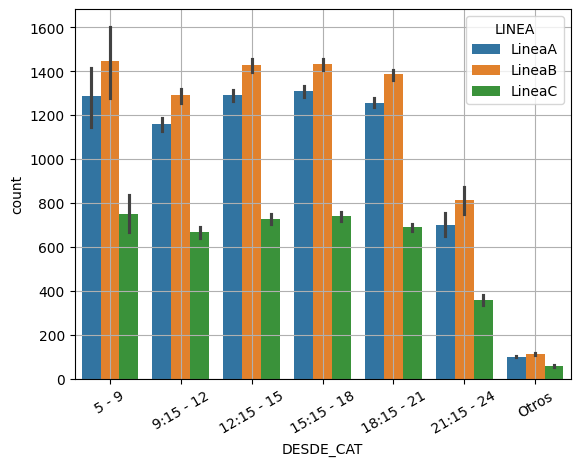

In [26]:

sns.barplot(data=tabla_ej1, x='DESDE_CAT', y='count', hue='LINEA')
plt.xticks(rotation=30)
plt.grid()

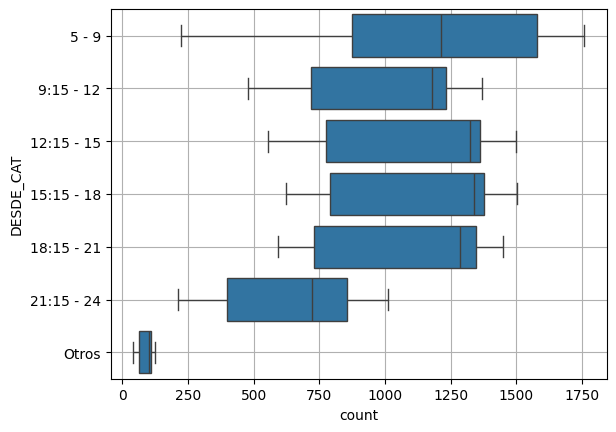

In [27]:
sns.boxplot(data=tabla_ej1, y='DESDE_CAT', x='count', orient='h')
#plt.yticks(rotation=30)
plt.grid()

2. Para cada línea, analice si los datos muestran alguna diferencia respecto de la cantidad total de pasajeros por rango horario entre días de semana (lunes a viernes) y fines de semana (sábado y domingo). Para ello, puede utilizar `weekday()` de la librería `datetime` , que indica los días de la semana con un número entero (*0 para lunes y 6 para domingo, por ejemplo).*

In [28]:
# binning_dia_semana = [0,1,2,3,4,5,6]
# labels_dia_semana = 
df['DIA_SEMANA'] = df['FECHA'].apply(lambda x : 'Laboral' if x.weekday() in [0,1,2,3,4] else 'FinDeSemana')
tabla_ej2 = df.groupby(['DIA_SEMANA','DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'count'})


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_43332\1063535454.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_ej2 = df.groupby(['DIA_SEMANA','DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'count'})


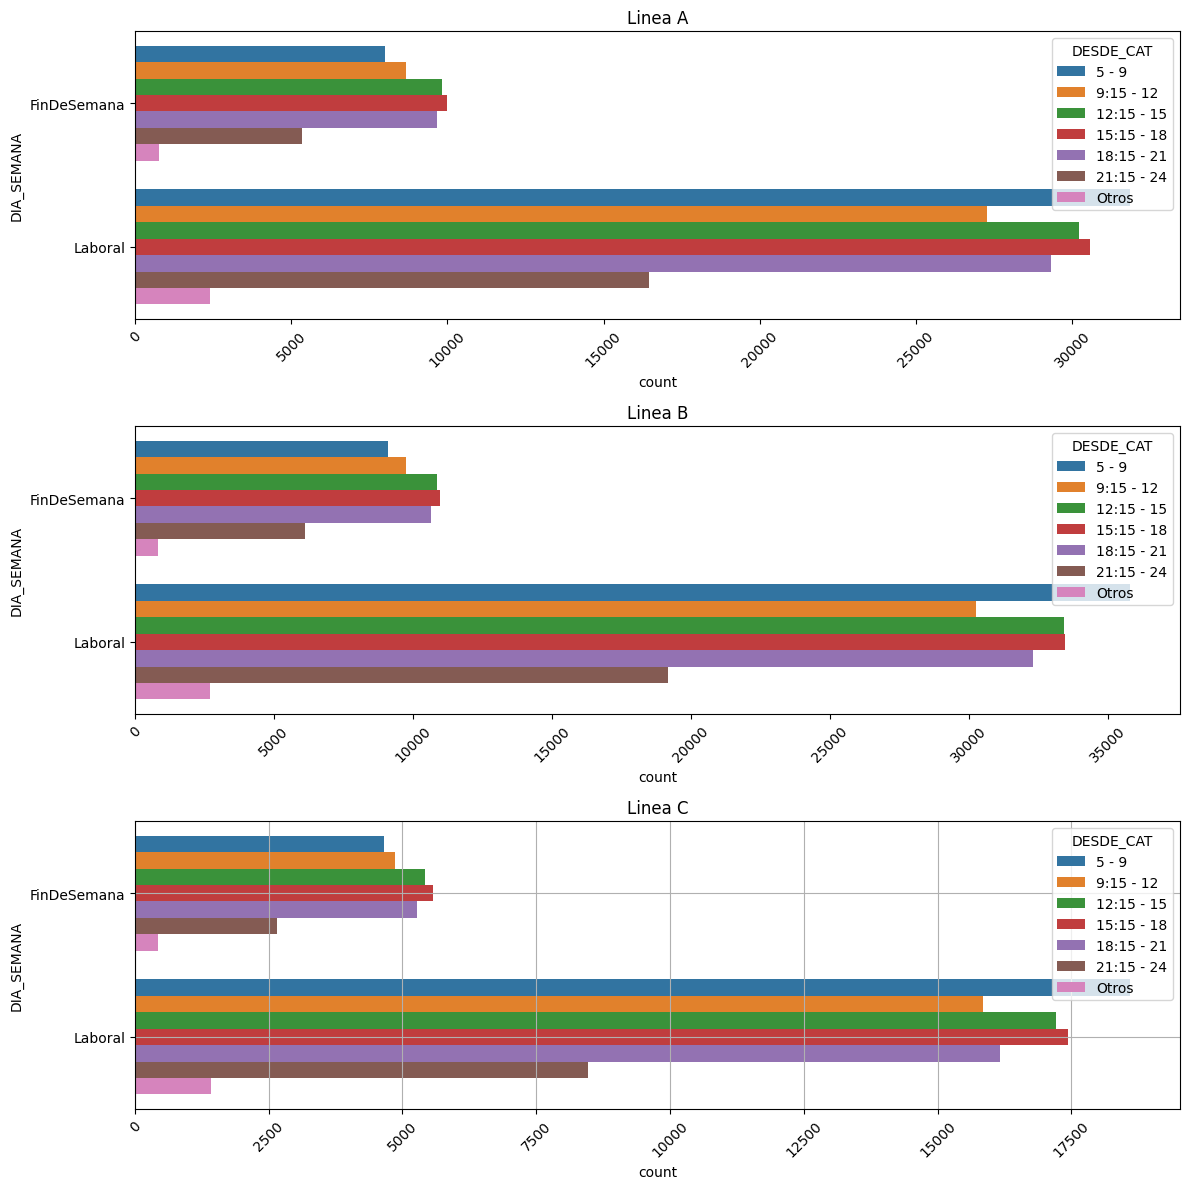

In [29]:
fig, axes = plt.subplots(3,1,figsize=(12,12))

sns.barplot(data=tabla_ej2[tabla_ej2['LINEA'] == 'LineaA'], y='DIA_SEMANA', x='count', hue='DESDE_CAT',ax=axes[0])
sns.barplot(data=tabla_ej2[tabla_ej2['LINEA'] == 'LineaB'], y='DIA_SEMANA', x='count', hue='DESDE_CAT',ax=axes[1])
sns.barplot(data=tabla_ej2[tabla_ej2['LINEA'] == 'LineaC'], y='DIA_SEMANA', x='count', hue='DESDE_CAT',ax=axes[2])
axes[0].set_title("Linea A")
axes[0].tick_params(axis='x', rotation=45)
axes[1].set_title("Linea B")
axes[1].tick_params(axis='x', rotation=45)
axes[2].set_title("Linea C")
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

3. Finalmente, consideraremos períodos de tiempo semanales sólo teniendo en cuenta los días hábiles:
    - Semana 1: 4 al 8 Julio 2022
    - Semana 2: 11 al 15 Julio 2022
    - Semana 3: 18 al 22 Julio 2022
    - Semana 4: 25 al 29 Julio 2022

Teniendo en cuenta que las semanas 3 y 4 corresponden a las semanas de vacaciones de invierno en CABA, ¿se observa alguna diferencia en la cantidad de pasajeros totales en los distintos rangos horarios en cada línea para estas semanas respecto a las 2 primeras? 

In [30]:
inicio_semana1 = pd.to_datetime('2022-07-04')
fin_semana1 = pd.to_datetime('2022-07-08')
inicio_semana2 = pd.to_datetime('2022-07-11')
fin_semana2 = pd.to_datetime('2022-07-15')
inicio_semana3 = pd.to_datetime('2022-07-18')
fin_semana3 = pd.to_datetime('2022-07-22')
inicio_semana4 = pd.to_datetime('2022-07-25')
fin_semana4 = pd.to_datetime('2022-07-29')

def asignar_semana(fecha):
    
    if inicio_semana1 <= fecha <= fin_semana1:
        return 'Semana 1'
    elif inicio_semana2 <= fecha <= fin_semana2:
        return 'Semana 2'
    elif inicio_semana3 <= fecha <= fin_semana3:
        return 'Semana 3'
    elif inicio_semana4 <= fecha <= fin_semana4:
        return 'Semana 4'
    else:
        return None
    
df['SEMANA'] = df['FECHA'].apply(asignar_semana)
df.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL,DESDE_CAT,DIA_SEMANA,SEMANA
0,2022-01-07,2025-06-26 05:15:00,5:30:00,LineaA,LineaA_Acoyte_N_Turn06,Acoyte,1,0,0,1,5 - 9,Laboral,None
1,2022-01-07,2025-06-26 05:15:00,5:30:00,LineaA,LineaA_Flores_Este_Turn03,Flores,1,0,0,1,5 - 9,Laboral,None
2,2022-01-07,2025-06-26 05:15:00,5:30:00,LineaA,LineaA_Lima_N_Turn01,Lima,1,0,0,1,5 - 9,Laboral,None
3,2022-01-07,2025-06-26 05:15:00,5:30:00,LineaA,LineaA_Peru_S_Turn03,Peru,1,0,0,1,5 - 9,Laboral,None
4,2022-01-07,2025-06-26 05:15:00,5:30:00,LineaA,LineaA_PJunta_N_Turn01,Primera Junta,1,0,0,1,5 - 9,Laboral,None


In [45]:
df['FECHA_HORA_CORRECTA'] = pd.to_datetime(df['FECHA'].astype(str) + ' ' + df['DESDE'].dt.time.astype(str))
tabla_ej3 = df.groupby(['SEMANA', 'DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'Conteo'})

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_43332\2235371789.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_ej3 = df.groupby(['SEMANA', 'DESDE_CAT', 'LINEA']).size().reset_index().rename(columns={0:'Conteo'})


In [46]:
tabla_ej3

,SEMANA,DESDE_CAT,LINEA,Conteo
0,Semana 1,5 - 9,LineaA,1570
1,Semana 1,5 - 9,LineaB,1748
2,Semana 1,5 - 9,LineaC,914
3,Semana 1,9:15 - 12,LineaA,1221
4,Semana 1,9:15 - 12,LineaB,1360
...,...,...,...,...
79,Semana 4,21:15 - 24,LineaB,4358
80,Semana 4,21:15 - 24,LineaC,1945
81,Semana 4,Otros,LineaA,531
82,Semana 4,Otros,LineaB,591


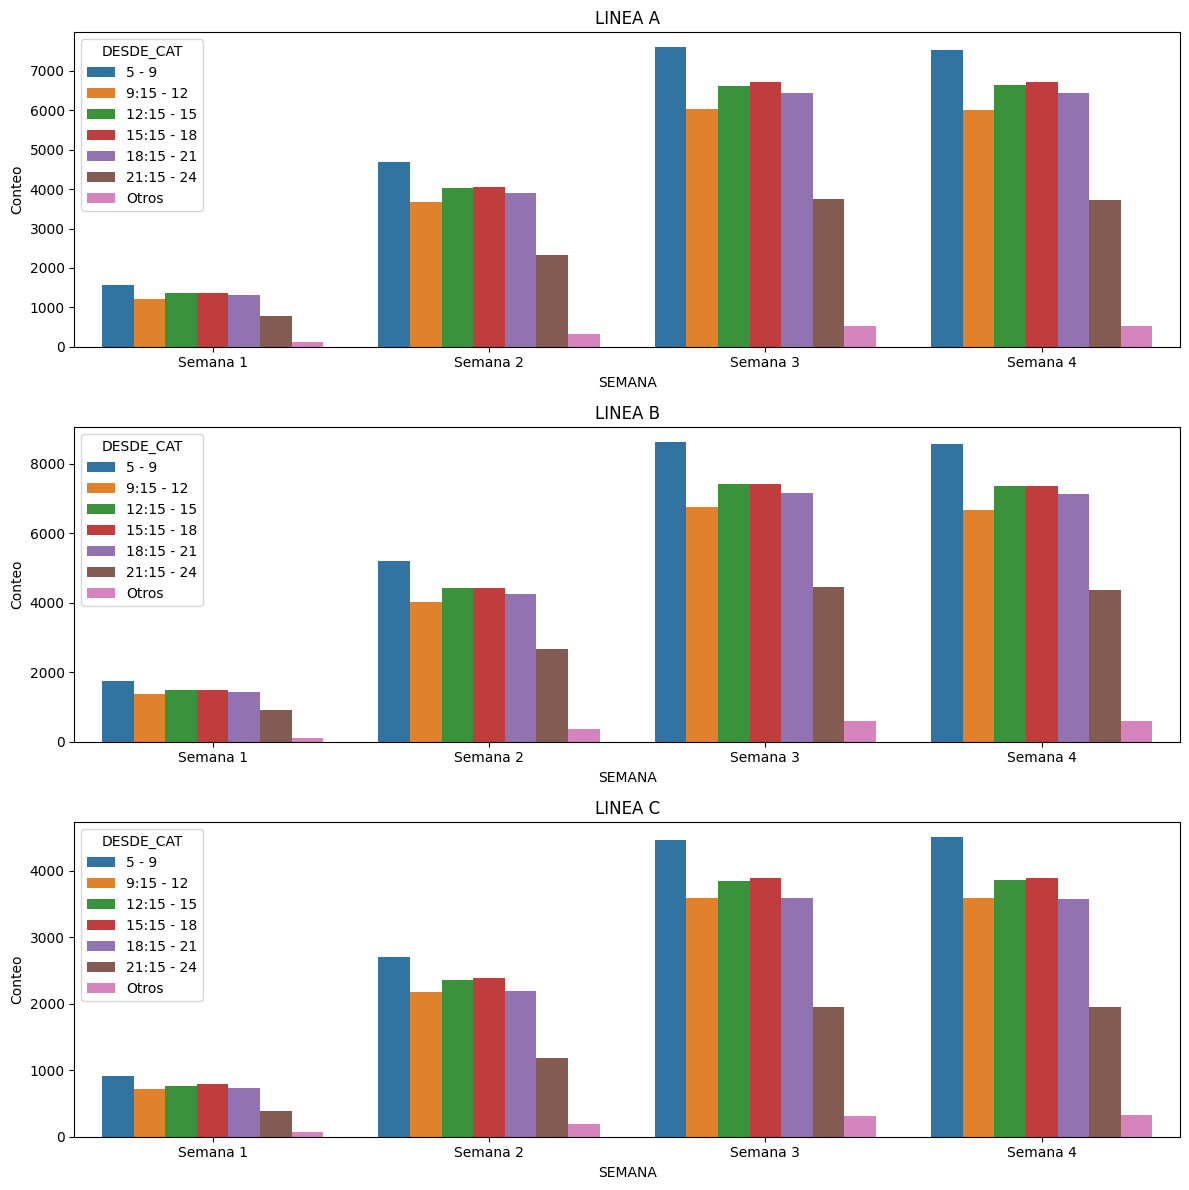

In [52]:
fig, axes = plt.subplots(3,1, figsize=(12,12))

sns.barplot(data=tabla_ej3[tabla_ej3['LINEA'] == 'LineaA'], x='SEMANA', y='Conteo', hue='DESDE_CAT', ax=axes[0])
sns.barplot(data=tabla_ej3[tabla_ej3['LINEA'] == 'LineaB'], x='SEMANA', y='Conteo', hue='DESDE_CAT', ax=axes[1])
sns.barplot(data=tabla_ej3[tabla_ej3['LINEA'] == 'LineaC'], x='SEMANA', y='Conteo', hue='DESDE_CAT', ax=axes[2])

axes[0].set_title("LINEA A")
axes[1].set_title("LINEA B")
axes[2].set_title("LINEA C")
plt.tight_layout()
plt.show()

In [53]:
# codigo optimizado (obtenido con gemini)
import pandas as pd
import numpy as np

# --- 1. Definir los períodos de forma estructurada ---
# Esto hace el código más limpio, legible y fácil de mantener.
# Si necesitas añadir más semanas, solo agregas una tupla a esta lista.
semanas_info = [
    # (semana,     Fecha Inicio,         Fecha Fin)
    ('Semana 1', '2022-07-04', '2022-07-08'),
    ('Semana 2', '2022-07-11', '2022-07-15'),
    ('Semana 3', '2022-07-18', '2022-07-22'),
    ('Semana 4', '2022-07-25', '2022-07-29'),
]

# --- 2. Crear las listas de condiciones y elecciones para np.select() ---
# Aseguramos que la columna FECHA sea de tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Lista de condiciones booleanas (vectorizadas)
condiciones = [
    (df['FECHA'] >= pd.to_datetime(inicio)) & (df['FECHA'] <= pd.to_datetime(fin))
    for semana, inicio, fin in semanas_info
]

# Lista de valores a asignar si la condición es verdadera
opciones = [semana for semana, inicio, fin in semanas_info]

# --- 3. Aplicar np.select ---
# np.select(lista_de_condiciones, lista_de_elecciones, valor_por_defecto)
# Es el equivalente vectorizado de un if/elif/else.
df['SEMANA'] = np.select(condiciones, opciones, default=None)